In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [253]:

import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *


from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [254]:
test=pd.read_csv("/content/test.csv")
train=pd.read_csv("/content/train.csv")

In [255]:
test.head()

,@CoffeeVectors @jenny____r confirmed #ChatGPT has dad jokes https://t.co/tC2Sks2f76,Positive
0,Sooooo depressing (our competition as journos ...,Negative
1,I just had a 4 hour deep conversation with #Ch...,Positive
2,I began to explore #chatgpt today.\n\nI asked ...,Negative
3,/2023\n1. Ask #ChatGPT\n2. Add some content\n3...,Positive
4,#Explained: Are you soon going to be replaced?...,Negative


In [256]:
test.shape

(170, 2)

In [257]:
train.head()

,Tweets,label
0,Asked #ChatGPT about what it thinks are the pr...,Positive
1,#ChatGPT tornado has already traveled around t...,Neutral
2,This is a great explanation of why #EVs are mo...,Positive
3,‘if you need to write a box-ticking social med...,Positive
4,Just saw an AI tool making my coffee for me. \...,Positive


In [258]:

tested = test.rename(columns={'@CoffeeVectors @jenny____r confirmed #ChatGPT has dad jokes https://t.co/tC2Sks2f76': 'Tweets', 'Positive':'label'})

In [259]:
tested

,Tweets,label
0,Sooooo depressing (our competition as journos ...,Negative
1,I just had a 4 hour deep conversation with #Ch...,Positive
2,I began to explore #chatgpt today.\n\nI asked ...,Negative
3,/2023\n1. Ask #ChatGPT\n2. Add some content\n3...,Positive
4,#Explained: Are you soon going to be replaced?...,Negative
...,...,...
165,Earth's #OpenAIChatGPT has become sentient an...,Positive
166,The first response was elaborate with some obv...,Positive
167,The absolutely terrifying inevitability of #Ch...,Negative
168,I asked ChatGPT what video would give the most...,Neutral


In [260]:
df = pd.concat([train, tested], ignore_index=True)

In [261]:
df

,Tweets,label
0,Asked #ChatGPT about what it thinks are the pr...,Positive
1,#ChatGPT tornado has already traveled around t...,Neutral
2,This is a great explanation of why #EVs are mo...,Positive
3,‘if you need to write a box-ticking social med...,Positive
4,Just saw an AI tool making my coffee for me. \...,Positive
...,...,...
935,Earth's #OpenAIChatGPT has become sentient an...,Positive
936,The first response was elaborate with some obv...,Positive
937,The absolutely terrifying inevitability of #Ch...,Negative
938,I asked ChatGPT what video would give the most...,Neutral


In [262]:

df.isnull().sum()

Tweets    171
label     171
dtype: int64

In [263]:
df.dropna(axis=0, inplace=True)

In [264]:
df.shape

(769, 2)

<Axes: xlabel='label'>

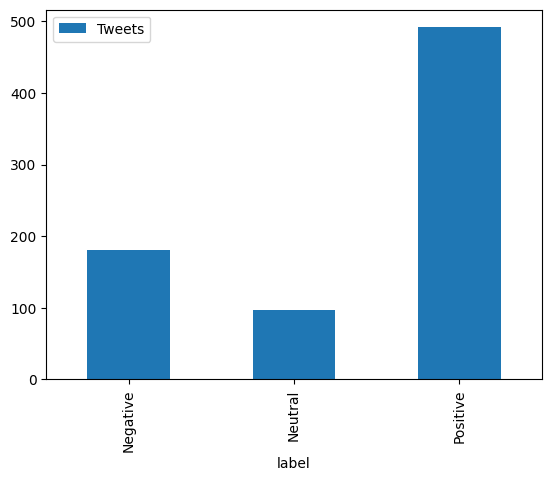

In [265]:
df.groupby('label').count().plot(kind='bar')

<Axes: >

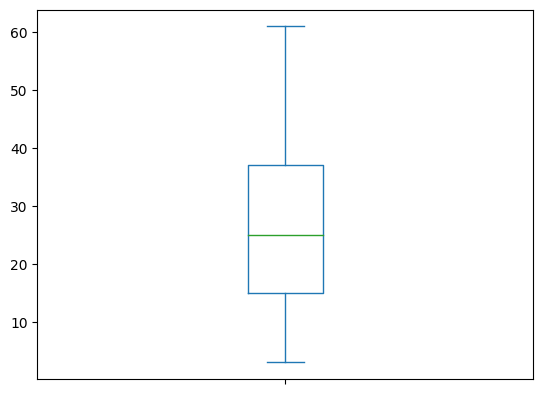

In [266]:

tweet_len = pd.Series([len(tweet.split()) for tweet in df['Tweets']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

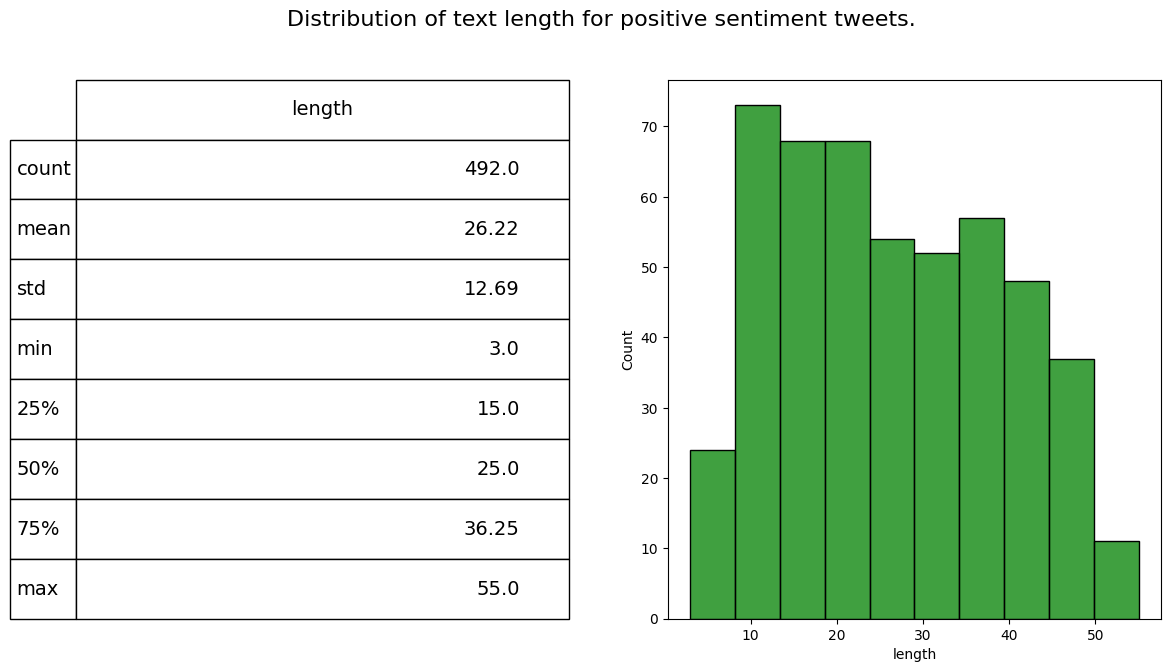

In [267]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Tweets.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['label']=='Positive']['length'], ax=ax1,color='green')
describe = df.length[df.label=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

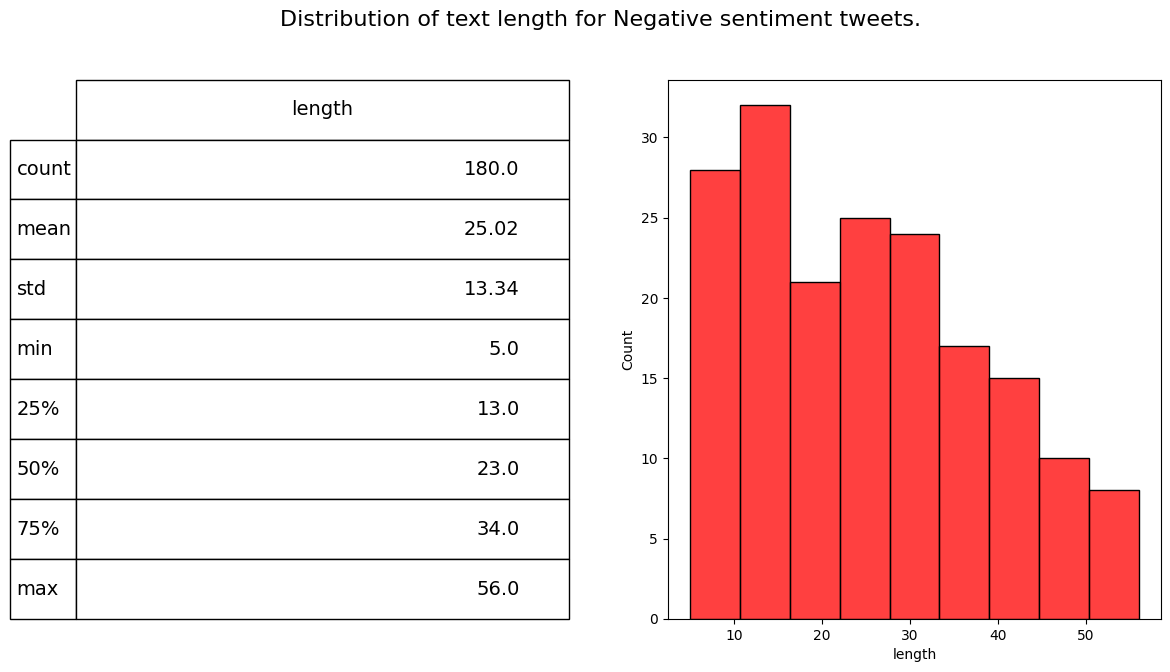

In [268]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Tweets.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['label']=='Negative']['length'], ax=ax1,color='red')
describe = df.length[df.label=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

plt.show()

In [269]:
import plotly.express as px
fig = px.pie(df, names='label', title ='Pie chart of different sentiments of tweets')
fig.show()

In [270]:
df.drop(['length'], axis=1, inplace=True)
df.head

<bound method NDFrame.head of                                                 Tweets     label
0    Asked #ChatGPT about what it thinks are the pr...  Positive
1    #ChatGPT tornado has already traveled around t...   Neutral
2    This is a great explanation of why #EVs are mo...  Positive
3    ‘if you need to write a box-ticking social med...  Positive
4    Just saw an AI tool making my coffee for me. \...  Positive
..                                                 ...       ...
935  Earth's #OpenAIChatGPT  has become sentient an...  Positive
936  The first response was elaborate with some obv...  Positive
937  The absolutely terrifying inevitability of #Ch...  Negative
938  I asked ChatGPT what video would give the most...   Neutral
939  Not every postgrad student trying this prompt ...   Neutral

[769 rows x 2 columns]>

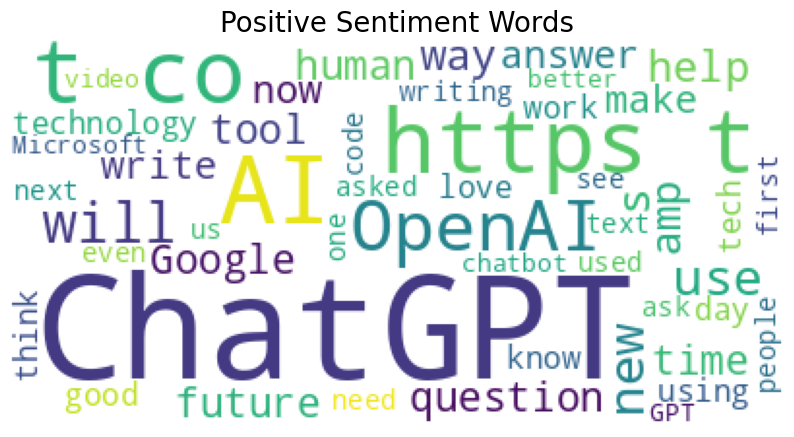

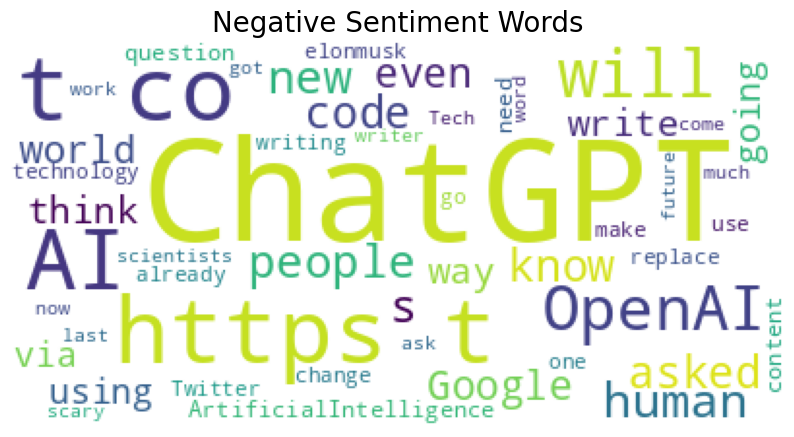

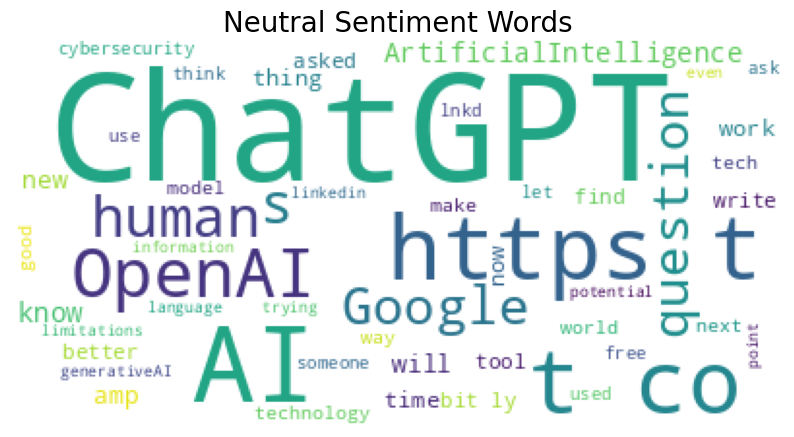

In [271]:
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, label):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.label==label]['Tweets']])

    # Initialize wordcloud object
    wc = WordCloud(background_color='white',
                   max_words=50,
                   stopwords = STOPWORDS)
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(label), fontsize=20)
    plt.axis('off')
    plt.show()

# Positive tweet words
wordcount_gen(df, 'Positive')

# Negative tweet words
wordcount_gen(df, 'Negative')

# Neutral tweet words
wordcount_gen(df, 'Neutral')

In [272]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''

    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['Tweets'][0])
print("\nProcessed tweet ->", tweet_to_words(df['Tweets'][0]))


Original tweet -> Asked #ChatGPT about what it thinks are the problems associated with urbanisation in India &amp; the solutions to be adopted to boost public transport use in our cities. Interesting set of responses. 

#EconTwitter #UrbanEconomics @sselvan https://t.co/yTyD2ypxDh

Processed tweet -> ['ask', 'chatgpt', 'think', 'problem', 'associ', 'urbanis', 'india', 'amp', 'solut', 'adopt', 'boost', 'public', 'transport', 'use', 'citi', 'interest', 'set', 'respons', 'econtwitt', 'urbaneconom', 'sselvan', 'http', 'co', 'ytyd2ypxdh']


In [273]:
X = list(map(tweet_to_words, df['Tweets']))

In [274]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['label'])

In [275]:
print(X[0])
print(Y[0])

['ask', 'chatgpt', 'think', 'problem', 'associ', 'urbanis', 'india', 'amp', 'solut', 'adopt', 'boost', 'public', 'transport', 'use', 'citi', 'interest', 'set', 'respons', 'econtwitt', 'urbaneconom', 'sselvan', 'http', 'co', 'ytyd2ypxdh']
2


In [276]:
y = pd.get_dummies(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [277]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x)
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [278]:
import sklearn.preprocessing as pr
X_train = pr.normalize(X_train, axis=1)
X_test  = pr.normalize(X_test, axis=1)

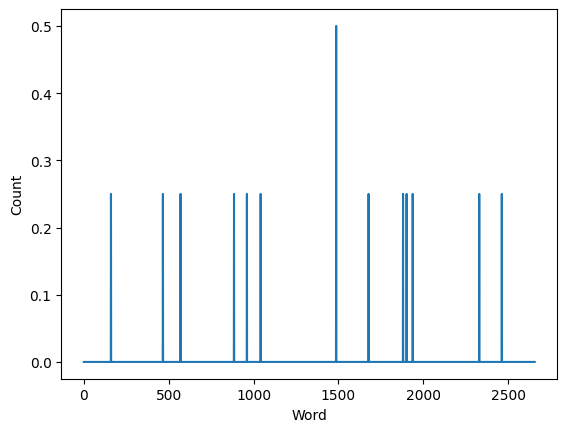

In [279]:
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [280]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=100

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer
print('Before Tokenization & Padding \n', df['Tweets'][0])
X, tokenizer = tokenize_pad_sequences(df['Tweets'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 Asked #ChatGPT about what it thinks are the problems associated with urbanisation in India &amp; the solutions to be adopted to boost public transport use in our cities. Interesting set of responses. 

#EconTwitter #UrbanEconomics @sselvan https://t.co/yTyD2ypxDh
After Tokenization & Padding 
 [  52    1   28   30    9  801   26    2  613  802   16 1827   14  614
   56    2  803    3   22 1828    3 1829  356 1830   47   14   66 1831
  215  493    7  357 1832 1833 1834   13   12   11 1835    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [281]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [282]:
y = pd.get_dummies(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (461, 100) (461, 3)
Validation Set -> (154, 100) (154, 3)
Test Set -> (154, 100) (154, 3)


In [283]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
import numpy as np

vocab_size = 5000
embedding_size = 32
max_len = 100  # Assuming a maximum sequence length of 100, please adjust accordingly
epochs = 20
learning_rate = 0.1

# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    decay_rate = learning_rate / epochs
    return lr / (1 + decay_rate * epoch)

# Create a learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Build model
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

# Define optimizer
sgd = SGD(learning_rate=learning_rate, momentum=0.8, nesterov=False)

# Compile model
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 32)           160000    
                                                                 
 conv1d_10 (Conv1D)          (None, 100, 32)           3104      
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 50, 32)            0         
 ng1D)                                                           
                                                                 
 bidirectional_10 (Bidirect  (None, 64)                16640     
 ional)                                                          
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 3)               

In [284]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd,
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,validation_data=(X_val, y_val),batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 32)           160000    
                                                                 
 conv1d_10 (Conv1D)          (None, 100, 32)           3104      
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 50, 32)            0         
 ng1D)                                                           
                                                                 
 bidirectional_10 (Bidirect  (None, 64)                16640     
 ional)                                                          
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 3)               

In [285]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)

# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.6234
Precision : 0.6234
Recall    : 0.6234
F1 Score  : 0.6234


In [286]:
model.save('best_model.h5')
print('Best model saved')

Best model saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [293]:
from keras.models import load_model

# Load model
model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=100

    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [297]:
predict_class("very good")

1/1 [==============================] - 0s 51ms/step
The predicted sentiment is Positive


1/1 [==============================] - 0s 48ms/step
The predicted sentiment is Positive
